In [12]:
from datetime import timedelta

from matplotlib import pyplot
import pandas
import seaborn

import swasputils

## Intersection of Long Period Pulsators and Eclipsing Binaries

In [2]:
s = swasputils.AggregatedClassifications()

In [3]:
seconds_in_100_days = timedelta(days=100).total_seconds()

In [4]:
pulsators = s.pulsators
pulsators.df = pulsators.df[pulsators.df['Period'] >= seconds_in_100_days]
eaebs = s.eaebs
ews = s.ews
eclipsing = swasputils.AggregatedClassifications(df=pandas.concat([eaebs.df, ews.df]))
id_intersection = set(pulsators.df['SWASP ID']) & set(eclipsing.df['SWASP ID'])
len(id_intersection)

29

## Crossover Between all Classes

<AxesSubplot:title={'center':'Sources with Multiple Classes in SuperWASP'}, xlabel='Category 2', ylabel='Category 1'>

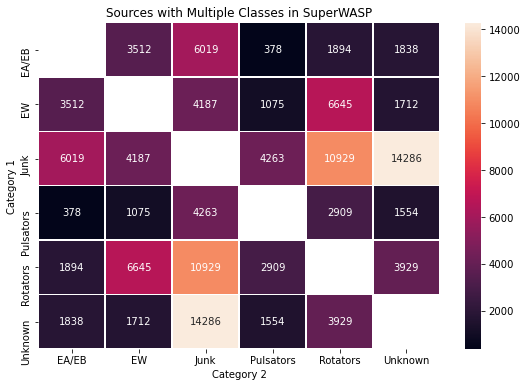

In [41]:
classes = {
    'Pulsators': s.pulsators.df,
    'EA/EB': s.eaebs.df,
    'EW': s.ews.df,
    'Rotators': s.rotators.df,
    'Unknown': s.unknowns.df,
    'Junk': s.junk.df,
}

left_cats = []
right_cats = []
intersection_counts = []
for left_cat, left_df in classes.items():
    for right_cat, right_df in classes.items():
        if left_cat == right_cat:
            continue
        left_cats.append(left_cat)
        right_cats.append(right_cat)
        intersection_counts.append(len(set(left_df['SWASP ID']) & set(right_df['SWASP ID'])))

intersection_df = pandas.DataFrame({
    'Category 1': left_cats,
    'Category 2': right_cats,
    'Intersections': intersection_counts,
})

intersection_pivot = intersection_df.pivot('Category 1', 'Category 2', 'Intersections')

f, ax = pyplot.subplots(figsize=(9, 6))
pyplot.title('Sources with Multiple Classes in SuperWASP')
seaborn.heatmap(intersection_pivot, annot=True, fmt=".0f", linewidths=.5, ax=ax)